In [1]:
# 1. INPUT PARAMETERS
import numpy as np
import matplotlib.pyplot as plt

class SpectraParameters:
    def __init__(self, pixels, poly_order_range, num_peaks_range, snr_range, cosmic_ray_prob, num_spectra, wavelengths, spectrum):
        self.pixels = pixels
        self.poly_order_range = poly_order_range
        self.num_peaks_range = num_peaks_range
        self.snr_range = snr_range
        self.cosmic_ray_prob = cosmic_ray_prob
        self.num_spectra = num_spectra
        self.wavelengths = np.linspace(0, 1, self.pixels)
               
# Define parameter ranges
pixels = 1024
poly_order_range = (3, 10)
num_peaks_range = (2, 5)
snr_range = (10, 100)
cosmic_ray_prob = 0.1
num_spectra = 50

# Generate synthetic wavelengths & spectrum
wavelengths = np.linspace(0, 1, pixels)
spectrum = np.zeros(pixels)

# Create instance of SpectraParameters
spectra_params = SpectraParameters(
    pixels=1024,
    poly_order_range=poly_order_range,
    num_peaks_range=num_peaks_range,
    snr_range=snr_range,
    cosmic_ray_prob=cosmic_ray_prob,
    num_spectra=num_spectra,
    wavelengths=wavelengths,
    spectrum=spectrum,
)

# Print parameter values
print("Number of pixels:", spectra_params.pixels)
print("Polynomial order range:", spectra_params.poly_order_range)
print("Number of peaks range:", spectra_params.num_peaks_range)
print("SNR range:", spectra_params.snr_range)
print("Cosmic ray probability:", spectra_params.cosmic_ray_prob)
print("Number of spectra:", spectra_params.num_spectra)

Number of pixels: 1024
Polynomial order range: (3, 10)
Number of peaks range: (2, 5)
SNR range: (10, 100)
Cosmic ray probability: 0.1
Number of spectra: 50


Number of peaks: 2
SNR: (10, 100)


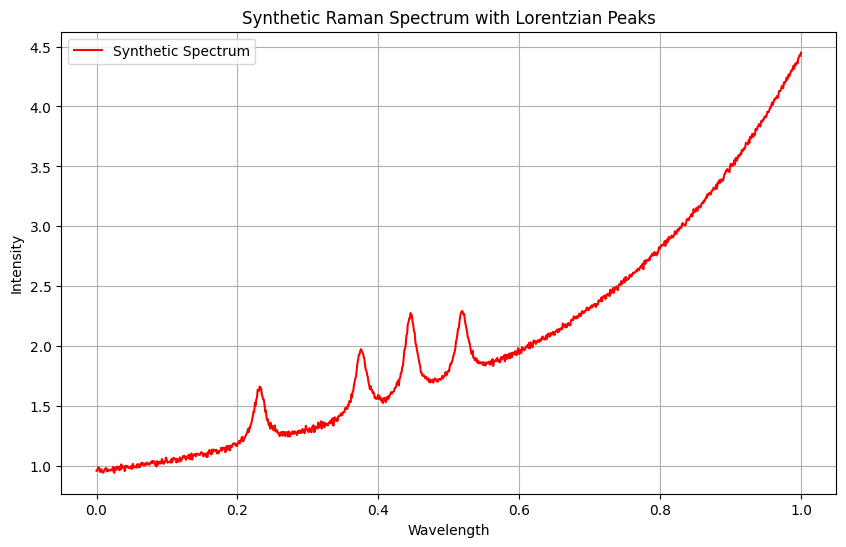

In [2]:
# 2. PEAK CHARACTERISTICS 
# Create Lorentzian peaks (specifications)
class SyntheticRamanSpectrum:
    def __init__(self, pixels, poly_order_range, num_peaks_range, snr_range, cosmic_ray_prob, num_spectra):
        self.pixels = pixels
        self.poly_order_range = poly_order_range
        self.num_peaks_range = num_peaks_range
        self.snr_range = snr_range
        self.cosmic_ray_prob = cosmic_ray_prob
        self.num_spectra = num_spectra
        self.wavelengths = np.linspace(0, 1, self.pixels)
        self.spectrum = self.generate_spectrum()

    def generate_spectrum(self):
        # Generate baseline using a polynomial
        poly_order = np.random.randint(self.poly_order_range[0], self.poly_order_range[1] + 1)
        baseline_coefficients = np.random.rand(poly_order + 1)
        baseline = np.polyval(baseline_coefficients, self.wavelengths)
        
         # Generate Lorentzian peaks
        peaks = np.zeros_like(self.wavelengths)
        num_peaks = np.random.randint(self.num_peaks_range[0], self.num_peaks_range[1] + 1)
        for _ in range(num_peaks):
            peak_amplitude = np.random.uniform(0, 1)
            peak_position = np.random.uniform(0.2, 0.8)
            peak_width = 1 / (self.pixels * 0.1)
            peaks += peak_amplitude * (peak_width ** 2) / ((self.wavelengths - peak_position) ** 2 + peak_width ** 2)

         # Add noise based on SNR
        snr = np.random.uniform(self.snr_range[0], self.snr_range[1])
        noise = np.random.normal(0, np.max(peaks) / snr, self.pixels)

        # Combine baseline, peaks, & noise
        spectrum = baseline + peaks + noise
        return spectrum

# Randomly generate parameters
num_peaks = np.random.randint(num_peaks_range[0], num_peaks_range[1] + 1)
snr = np.random.uniform(snr_range[0], snr_range[1])

# Create synthetic spectrum
synthetic_spectrum = SyntheticRamanSpectrum(pixels, poly_order_range, num_peaks_range, snr_range, cosmic_ray_prob, num_spectra)

# Print information
print("Number of peaks:", len(synthetic_spectrum.num_peaks_range))
print("SNR:", synthetic_spectrum.snr_range)

# Plot Lorentzian peaks
plt.figure(figsize=(10, 6))
plt.plot(synthetic_spectrum.wavelengths, synthetic_spectrum.spectrum, color= 'red', label='Synthetic Spectrum')
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.title('Synthetic Raman Spectrum with Lorentzian Peaks')
plt.legend()
plt.grid(True)
plt.show()